<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.2: Feature Selection II

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

### 5. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

#### 5.1 Load Wine Data & Define Predictor and Target

In [23]:
## Load the wine quality dataset
from sklearn.datasets import load_wine
wine_data = load_wine()

# Load the wine dataset from csv
wine = pd.read_csv('winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [24]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [25]:
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [26]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


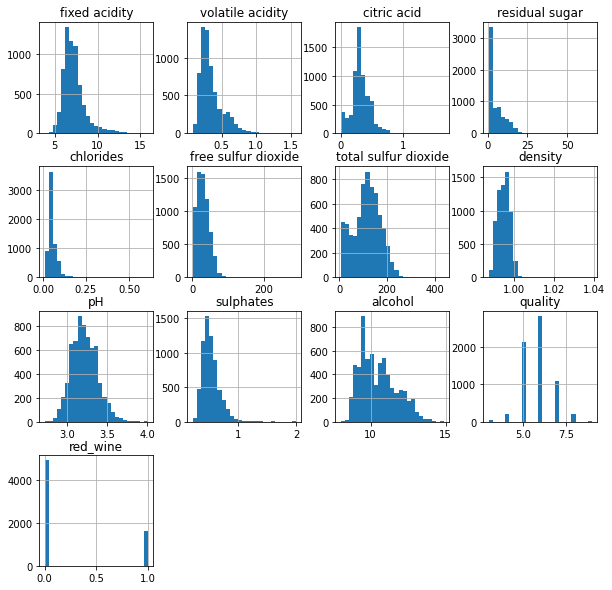

In [27]:
wine.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

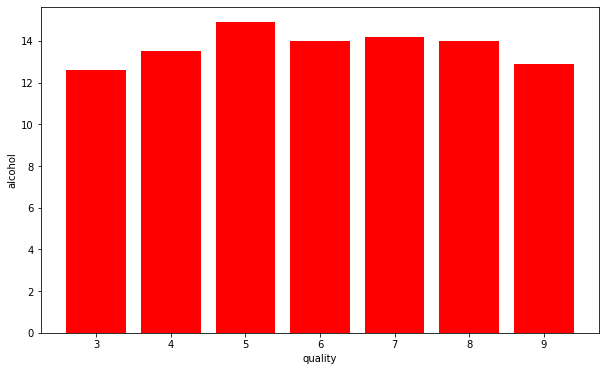

In [28]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(wine['quality'],wine['alcohol'],color='red')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')

<AxesSubplot:>

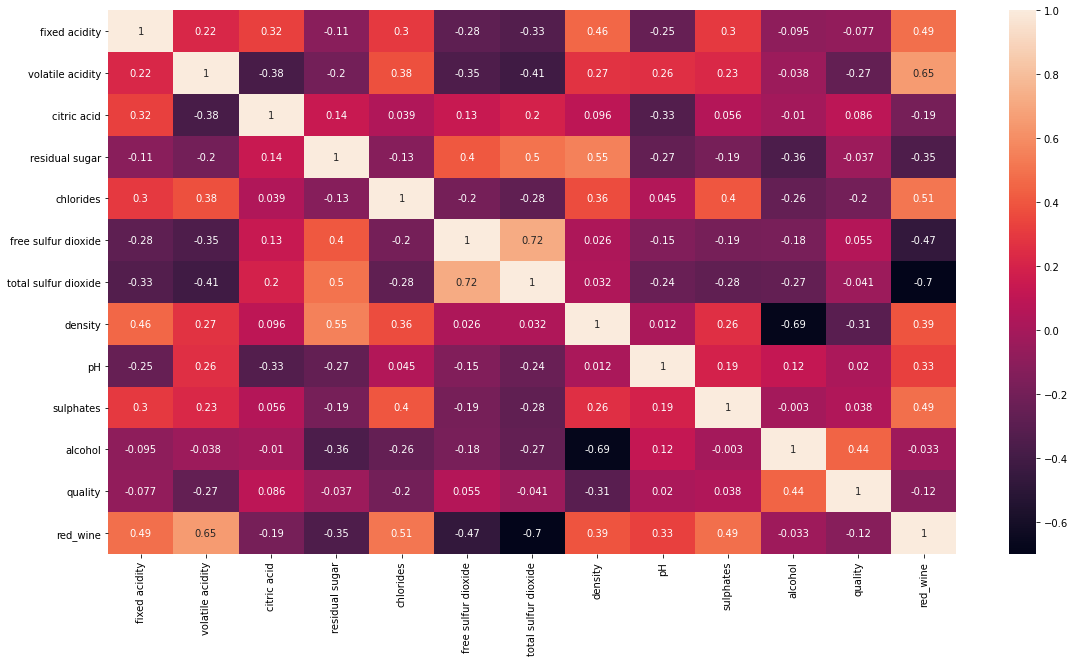

In [29]:
plt.figure(figsize=[19,10])
sns.heatmap(wine.corr(),annot=True)

#### 5.2 Overview of the code below

The external `while` loop goes forever until there are no improvements to the model, which is controlled by the flag `changed` (until is **not** changed).
The inner `for` loop goes over each of the features not yet included in the model and calculates the correlation coefficient. If any model improves on the previous best model then the records are updated.

#### Code variables
- `included`: list of the features (predictors) that were included in the model; starts empty.
- `excluded`: list of features that have **not** been included in the model; starts as the full list of features.
- `best`: dictionary to keep record of the best model found at any stage; starts 'empty'.
- `model`: object of class LinearRegression, with default values for all parameters.

#### Methods of the `LinearRegression` object to investigate
- `fit()`
- `fit.score()`

#### Adjusted $R^2$ formula
$$Adjusted \; R^2 = 1 - { (1 - R^2) (n - 1)  \over n - k - 1 }$$

#### Linear Regression [reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:

## Flag intermediate output

show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [32]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the test data
n = X_test.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) ) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = pH, red_wine, fixed acidity, volatile acidity, total sulfur dioxide, sulphates, citric acid, alcohol, density, residual sugar, free sulfur dioxide, chlorides
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = -0.001; Best = 0.000
(Step) Trying red_wine...
(Step) - Features = red_wine
(Step) - Adjusted R^2: This = 0.015; Best = 0.000
(Step) - New Best!   : Feature = red_wine; R^2 = 0.016; Adjusted R^2 = 0.015
(Step) Trying fixed acidity...
(Step) - Features = fixed acidity
(Step) - Adjusted R^2: This = 0.005; Best = 0.015
(Step) Trying volatile acidity...
(Step) - Features = volatile acidity
(Step) - Adjusted R^2: This = 0.072; Best = 0.015
(Step) - New Best!   : Feature = volatile acidity; R^2 = 0.073; Adjusted R^2 = 0.072
(Step) Trying total sulfur dioxide...
(Step) - Features = total sulfur dioxide
(Step) - Adjusted R^2: This = 0.001; Best = 0.072
(Step) Trying sulphates...
(Step) - Features = sulphates
(Step) - Adjusted R^2: This = 0.000; Bes

(Step) - Adjusted R^2: This = 0.288; Best = 0.289
(Step) Trying fixed acidity...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, fixed acidity
(Step) - Adjusted R^2: This = 0.289; Best = 0.289
(Step) - New Best!   : Feature = fixed acidity; R^2 = 0.293; Adjusted R^2 = 0.289
(Step) Trying total sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, total sulfur dioxide
(Step) - Adjusted R^2: This = 0.290; Best = 0.289
(Step) - New Best!   : Feature = total sulfur dioxide; R^2 = 0.295; Adjusted R^2 = 0.290
(Step) Trying citric acid...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, citric acid
(Step) - Adjusted R^2: This = 0.288; Best = 0.290
(Step) Trying chlorides...
(Step) - Features = alcohol, volatile acidity, sulphates, residual sugar, red_wine, density, free sulfur dioxide, c



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



